<a href="https://colab.research.google.com/github/JodhiKrisantus/Computer-Vision/blob/main/Copy_of_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models,layers

In [ ]:
#load data
(xtrain,ytrain),(xtest,ytest)= mnist.load_data()
print(xtrain.shape)
print(xtest.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


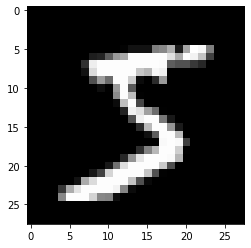

In [ ]:
plt.imshow(xtrain[0],cmap="gray")

In [ ]:
ytrain[0]

5

In [ ]:
#normalisasi
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
xtrain = xtrain.reshape(60000,28*28)
xtest = xtest.reshape(10000,28*28)
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [ ]:
#Encoder
input_layer = layers.Input(shape=(784,))
dense1 = layers.Dense(128,activation='relu')(input_layer)

#Code/Bottleneck
dense2 = layers.Dense(64,activation='relu')(dense1)

#Decoder
dense3 = layers.Dense(128,activation='relu')(dense2)
output_layer = layers.Dense(784,activation='sigmoid')(dense3)

model = models.Model(input_layer,output_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,xtrain, epochs=30, batch_size=128, shuffle=True, validation_data=(xtest,xtest))

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 0.6920 - accuracy: 4.6667e-04 - val_loss: 0.6902 - val_accuracy: 0.0011
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.6883 - accuracy: 8.0000e-04 - val_loss: 0.6859 - val_accuracy: 0.0017
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.6828 - accuracy: 0.0013 - val_loss: 0.6785 - val_accuracy: 0.0019
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.6716 - accuracy: 0.0018 - val_loss: 0.6615 - val_accuracy: 0.0018
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.6424 - accuracy: 0.0023 - val_loss: 0.6125 - val_accuracy: 0.0031
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.5558 - accuracy: 0.0032 - val_loss: 0.4786 - val_accuracy: 0.0034
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.4010 - accuracy: 0.0029 - val_loss: 0.3364 - val_accuracy: 0.002

In [ ]:
encoder = models.Model(input_layer,dense2)
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predenc = encoder.predict(xtest)
print(predenc.shape)
prediction = model.predict(xtest)
print(prediction.shape)

(10000, 64)
(10000, 784)


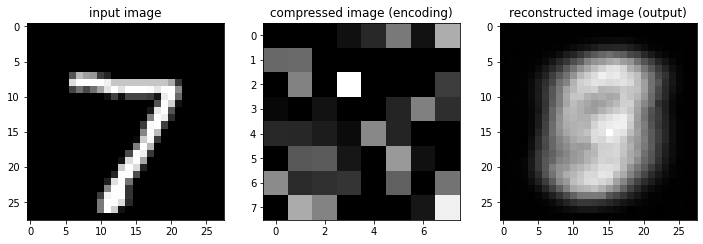

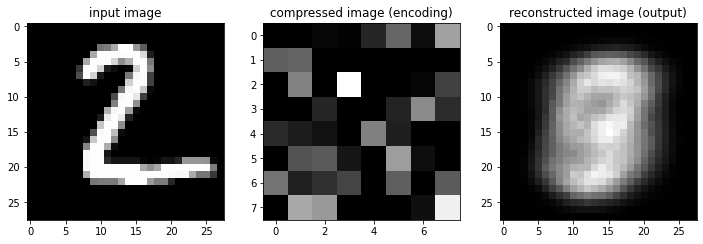

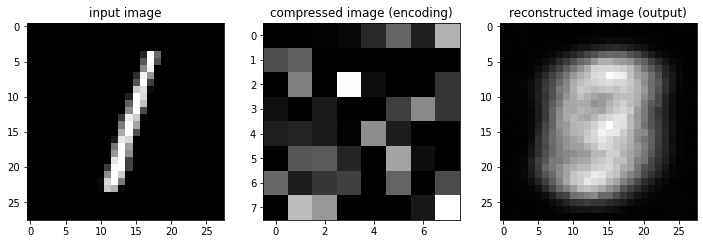

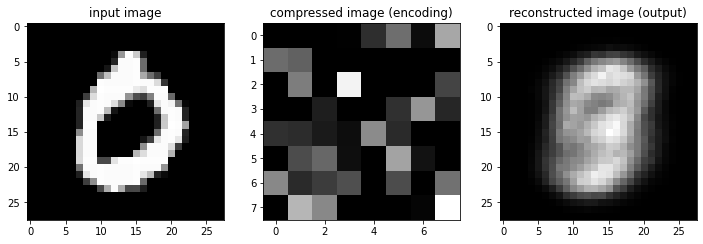

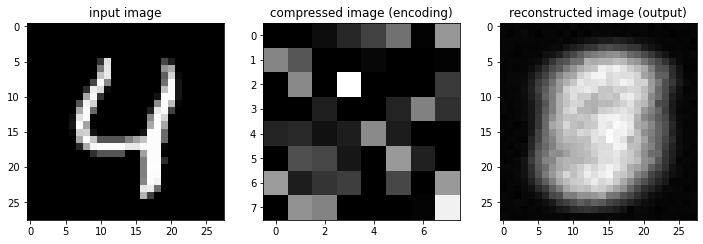

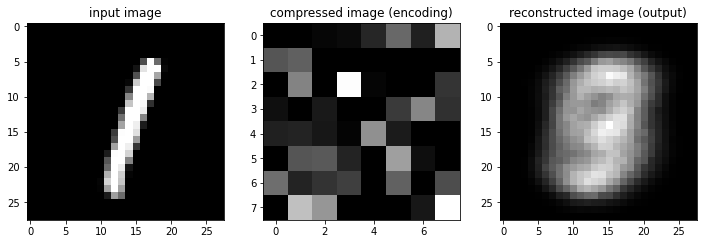

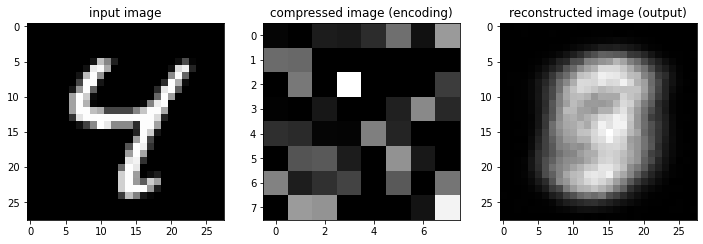

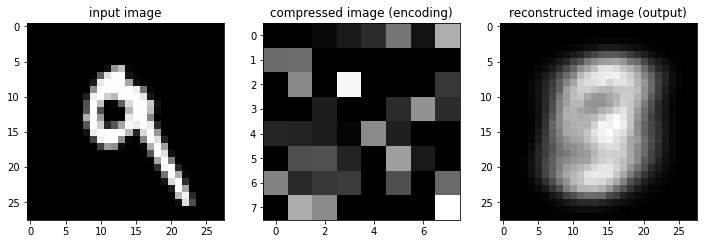

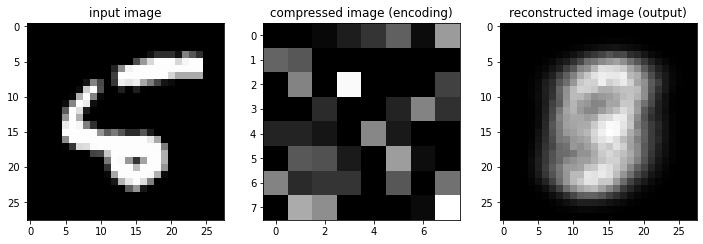

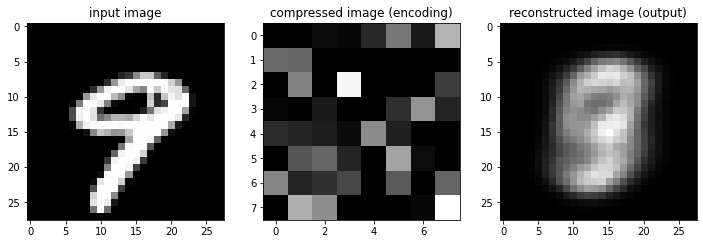

In [ ]:
n=10
for i in range(n):
  plt.figure(figsize=(12,4))
  plt.subplot(131)
  plt.title("input image")
  plt.imshow(xtest[i].reshape(28,28),cmap="gray")
  plt.subplot(132)
  plt.title("compressed image (encoding)")
  plt.imshow(predenc[i].reshape(8,8),cmap="gray")
  plt.subplot(133)
  plt.title("reconstructed image (output)")
  plt.imshow(prediction[i].reshape(28,28),cmap="gray")
  plt.show()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#load data
(xtrain,ytrain),(xtest,ytest)= mnist.load_data()

#scaling -1 sampai 1
xtrain = (xtrain - (255/2)) / (255/2)
xtest = (xtest - (255/2)) / (255/2)

xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
input_layer = layers.Input(shape=(28,28,1))
conv1 = layers.Conv2D(16, (3,3),activation="relu",padding="same",strides=(2,2))(input_layer)
conv2 = layers.Conv2D(8, (3,3),activation="relu",padding="same",strides=(2,2))(conv1)
conv3 = layers.Conv2DTranspose(8,(3,3),activation="relu",padding="same",strides=(2,2))(conv2)
conv4 = layers.Conv2DTranspose(16,(3,3),activation="relu",padding="same",strides=(2,2))(conv3)
output_layer = layers.Conv2D(1,(3,3),activation="tanh",padding="same")(conv4)

model2 = models.Model(input_layer,output_layer)
model2.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose_11 (Conv2D  (None, 14, 14, 8)        584       
 Transpose)                                                      
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 28, 28, 16)       1168      
 Transpose)                                                      
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 1)         145 

In [ ]:
from tensorflow.keras import losses

In [ ]:
model2.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [ ]:
import tensorflow as tf
noise_factor = 0.2
xtrain_noisy = xtrain + noise_factor * tf.random.normal(shape=xtrain.shape)
xtest_noisy = xtest + noise_factor * tf.random.normal(shape=xtest.shape)

xtrain_noisy = tf.clip_by_value(xtrain_noisy,-1.0,1.0)
xtest_noisy = tf.clip_by_value(xtest_noisy,-1.0,1.0)

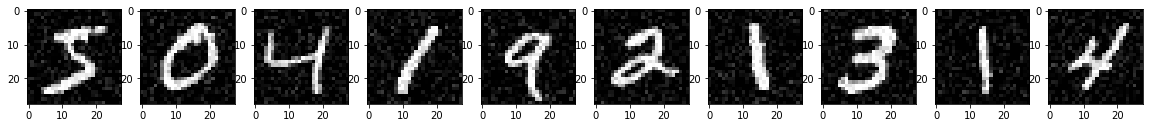

In [ ]:
n=10
plt.figure(figsize=(20,3))
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(tf.squeeze(xtrain_noisy[i]),cmap="gray")
plt.show()

In [ ]:
model2.fit(xtrain_noisy,xtrain, epochs=30,batch_size=128,shuffle=True,validation_data=(xtest_noisy,xtest))

Epoch 1/30
469/469 [==============================] - 13s 11ms/step - loss: 0.1365 - val_loss: 0.0238
Epoch 2/30
469/469 [==============================] - 4s 10ms/step - loss: 0.0174 - val_loss: 0.0123
Epoch 3/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 4/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0088 - val_loss: 0.0081
Epoch 5/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 6/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0074 - val_loss: 0.0071
Epoch 7/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 8/30
469/469 [==============================] - 4s 10ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 9/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 10/30
469/469 [==============================] - 4s 10ms/step - loss: 0.0064 - val_l

In [ ]:
prediction = model2.predict(xtest_noisy)
prediction.shape

(10000, 28, 28, 1)

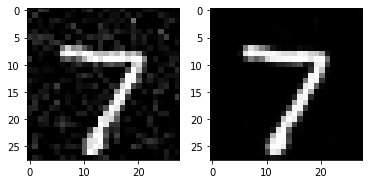

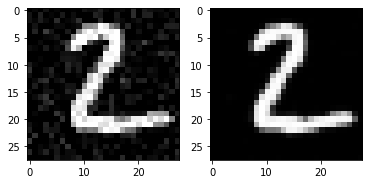

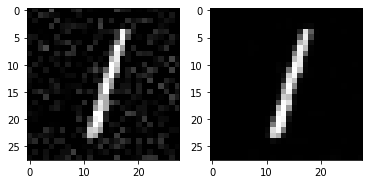

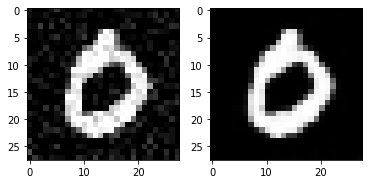

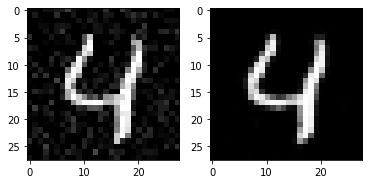

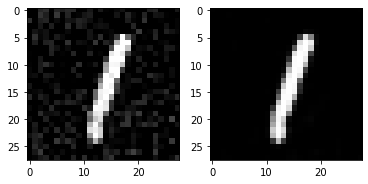

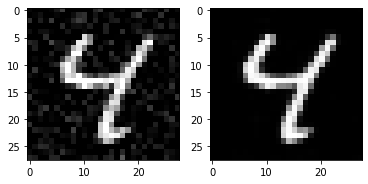

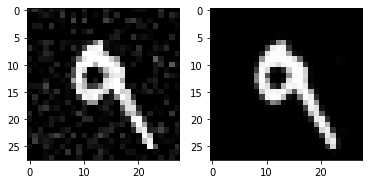

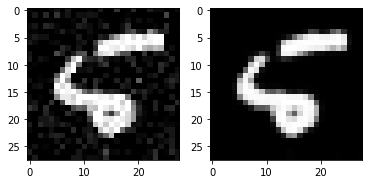

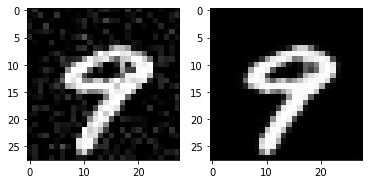

In [ ]:
n = 10
for i in range(n):
  plt.subplot(121)
  plt.imshow(tf.squeeze(xtest_noisy[i]),cmap="gray")
  plt.subplot(122)
  plt.imshow(prediction[i].reshape(28,28),cmap="gray")
  plt.show()